In [1]:
import wave
filename = "a.wav"
with wave.open(filename, "rb") as wave_file:
  framerate = wave_file.getframerate()

In [2]:
# https://stackoverflow.com/a/54621604/19470749 CC BY-SA 4.0

import sys
from aubio import source, pitch
import numpy as np

#(suggest not modify this line) the big win_s will get better analyze but take more time
win_s = 4096

#the small hop_s will get better analyze but take more time
hop_s = 16

# https://aubio.org/manual/latest/py_io.html?highlight=source#aubio.source
s = source(filename, samplerate=framerate, hop_size=hop_s)
tolerance = 1

# https://aubio.org/manual/latest/py_analysis.html?highlight=pitch#aubio.pitch
pitch_o = pitch(method="yin", buf_size=win_s, hop_size=hop_s, samplerate=framerate)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitches = []
confidences = []

total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitches += [pitch]
    confidence = pitch_o.get_confidence()
    confidences += [confidence]
    total_frames += read
    print("\r",total_frames,"/",s.duration,"%.4f"%(total_frames/s.duration),pitch,end="")
    if read < hop_s: break

 302336 / 302336 1.0000 0.0048796

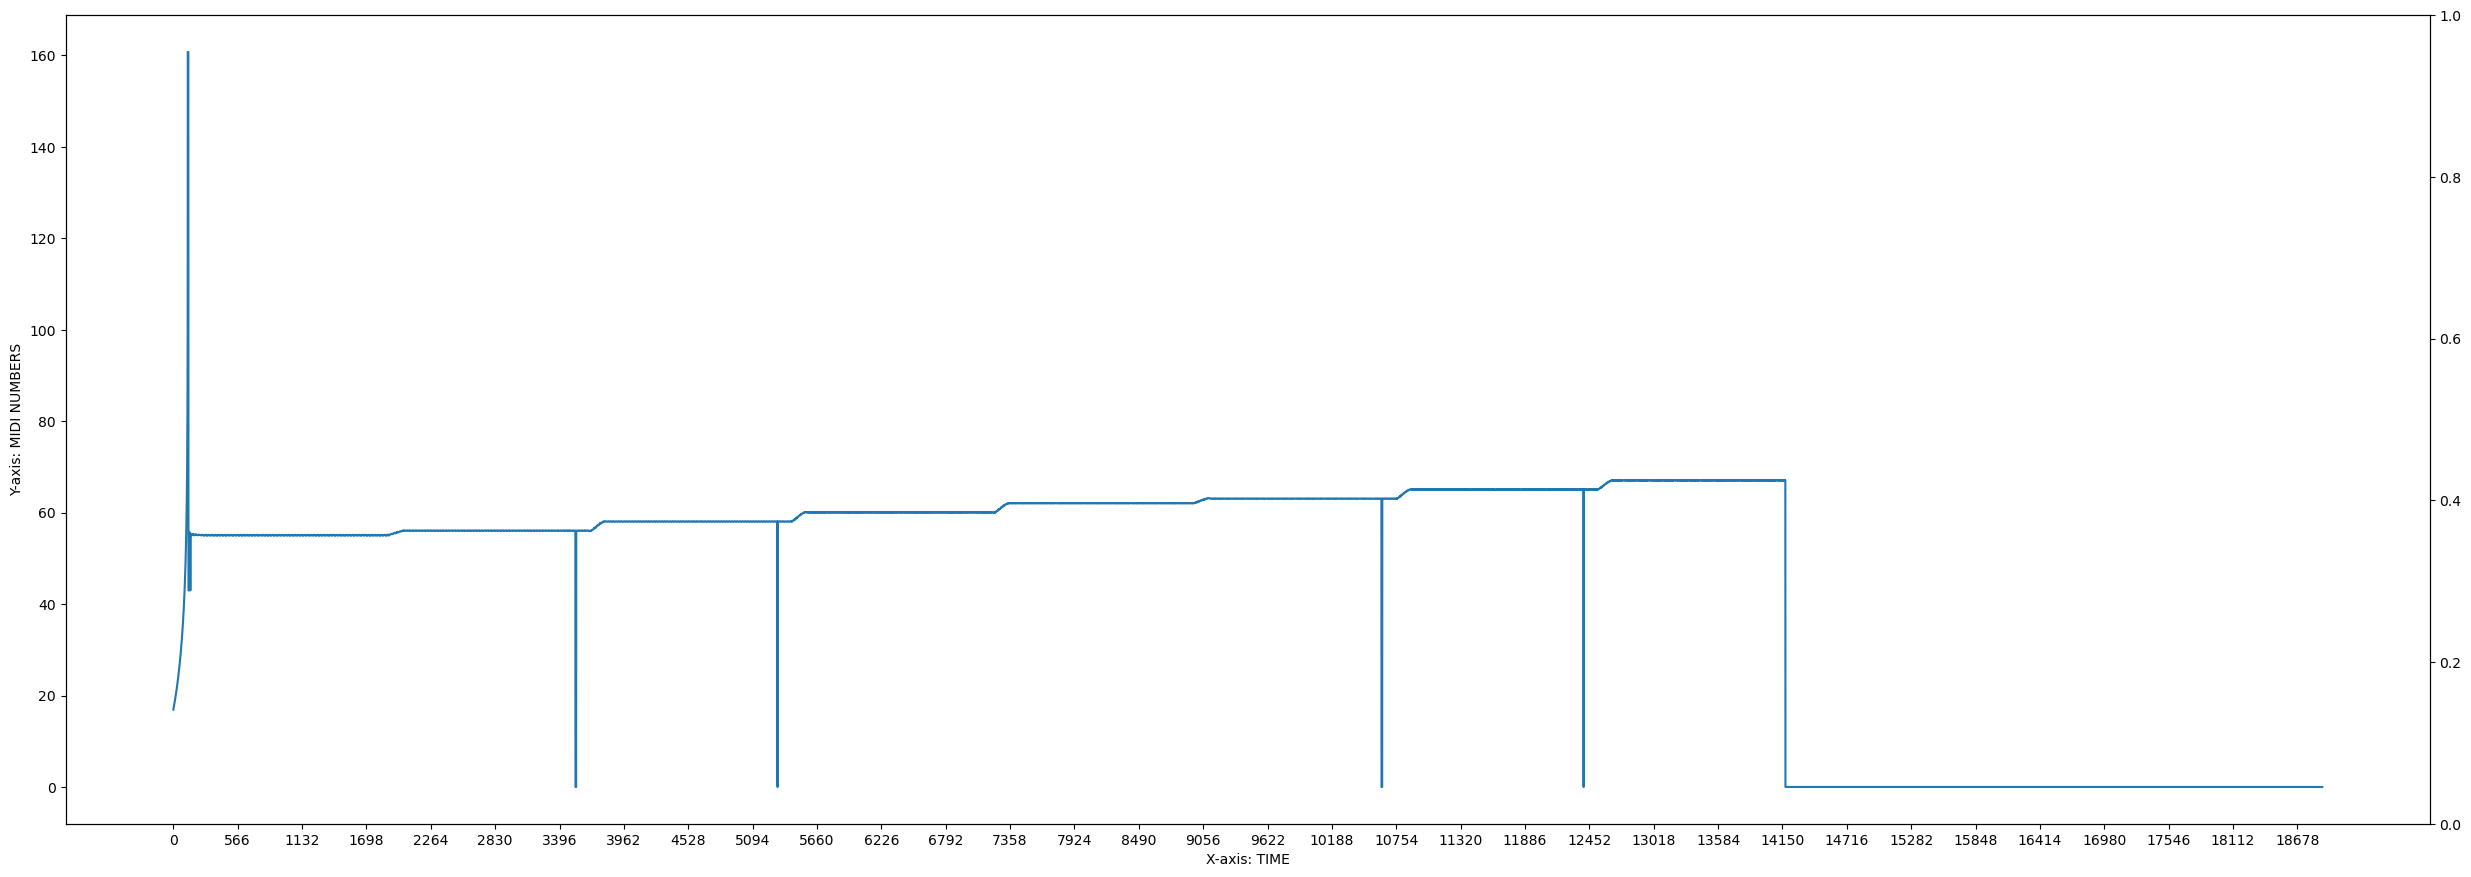

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [i for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis")
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: MIDI NUMBERS")


ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax2 = ax.twinx()
#ax2.set_xticklabels([ "%02d:%02d" % (t/float(samplerate)*hop_s/60, (t/float(samplerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

In [7]:
fig.savefig("midi number by frame.png")

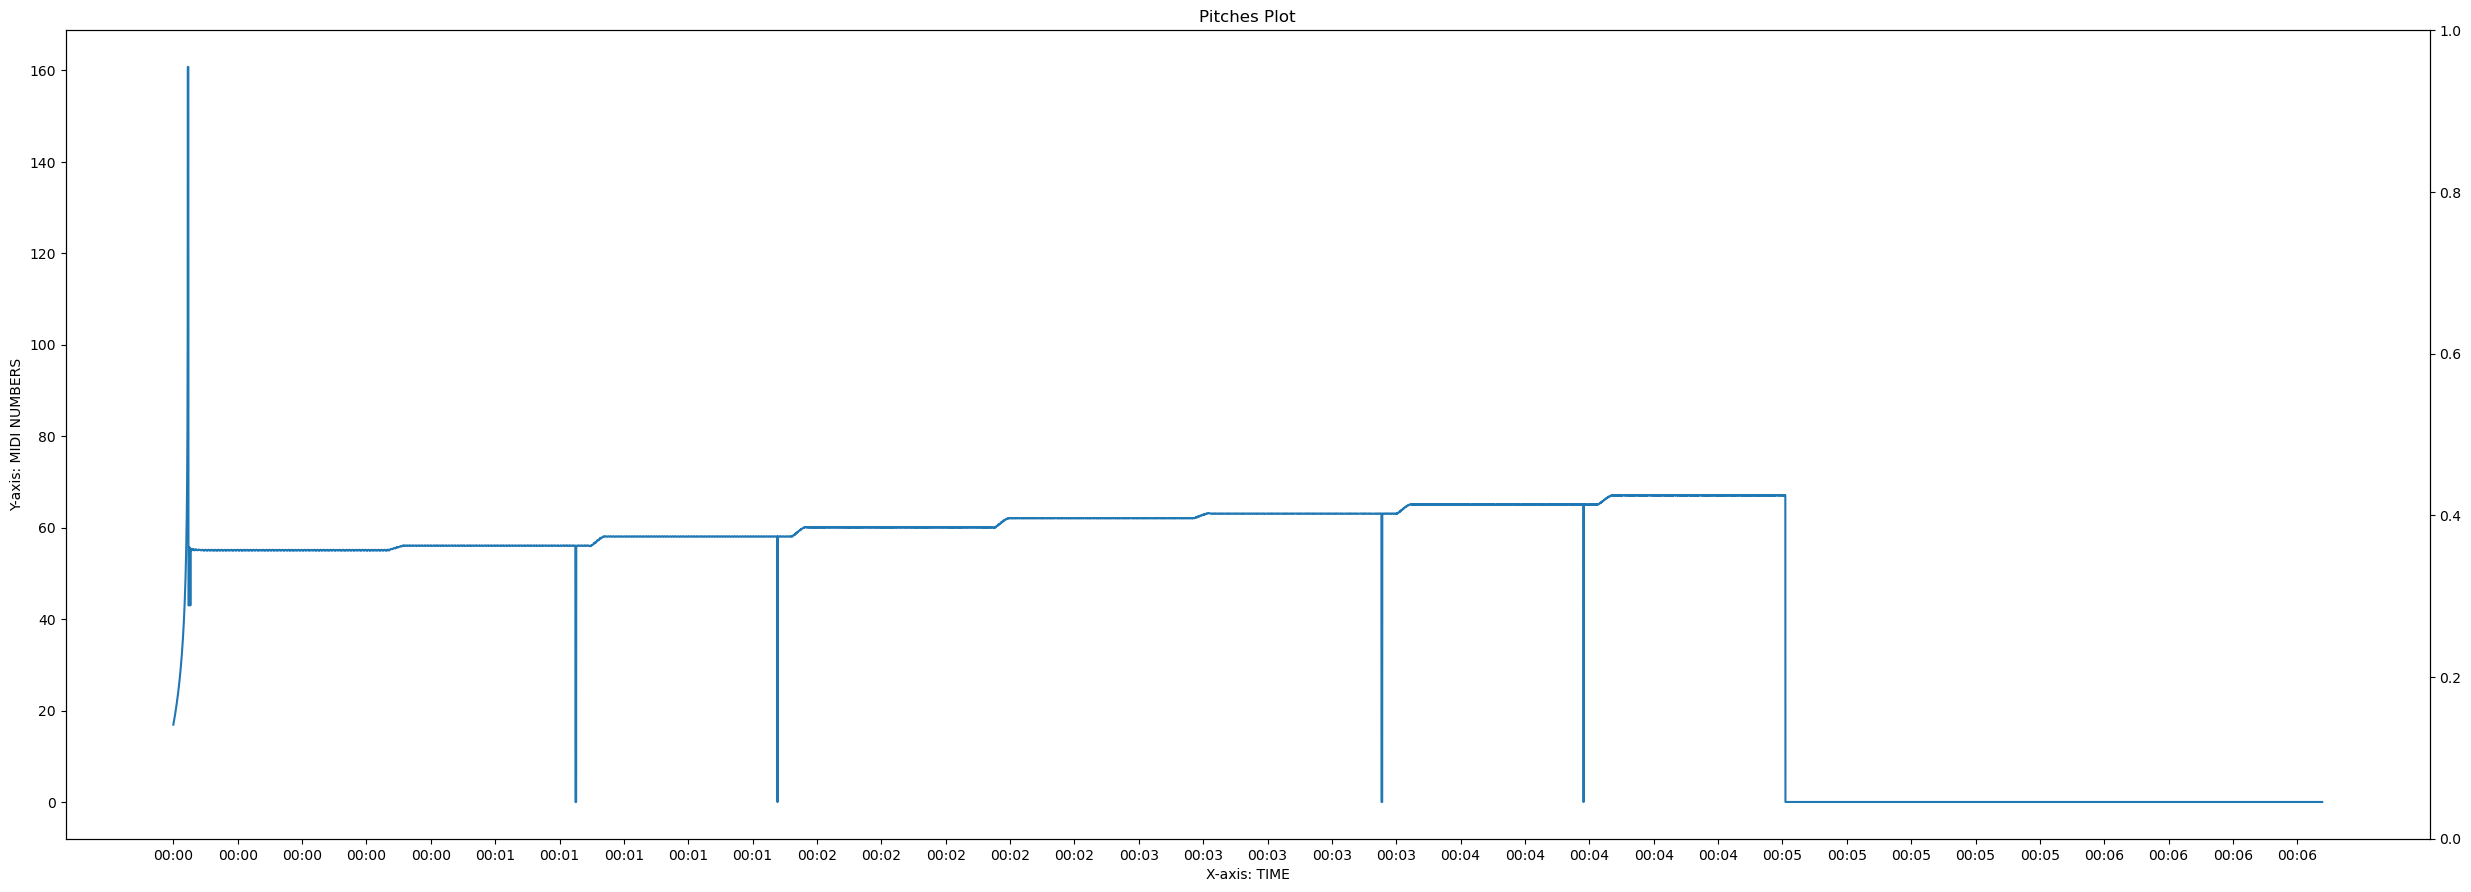

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [i for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: MIDI NUMBERS")
ax.set_title("Pitches Plot")


ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax2 = ax.twinx()
ax2.set_xticklabels([ "%02d:%02d" % (t/float(framerate)*hop_s/60, (t/float(framerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

In [9]:
fig.savefig("midi number by time.png")

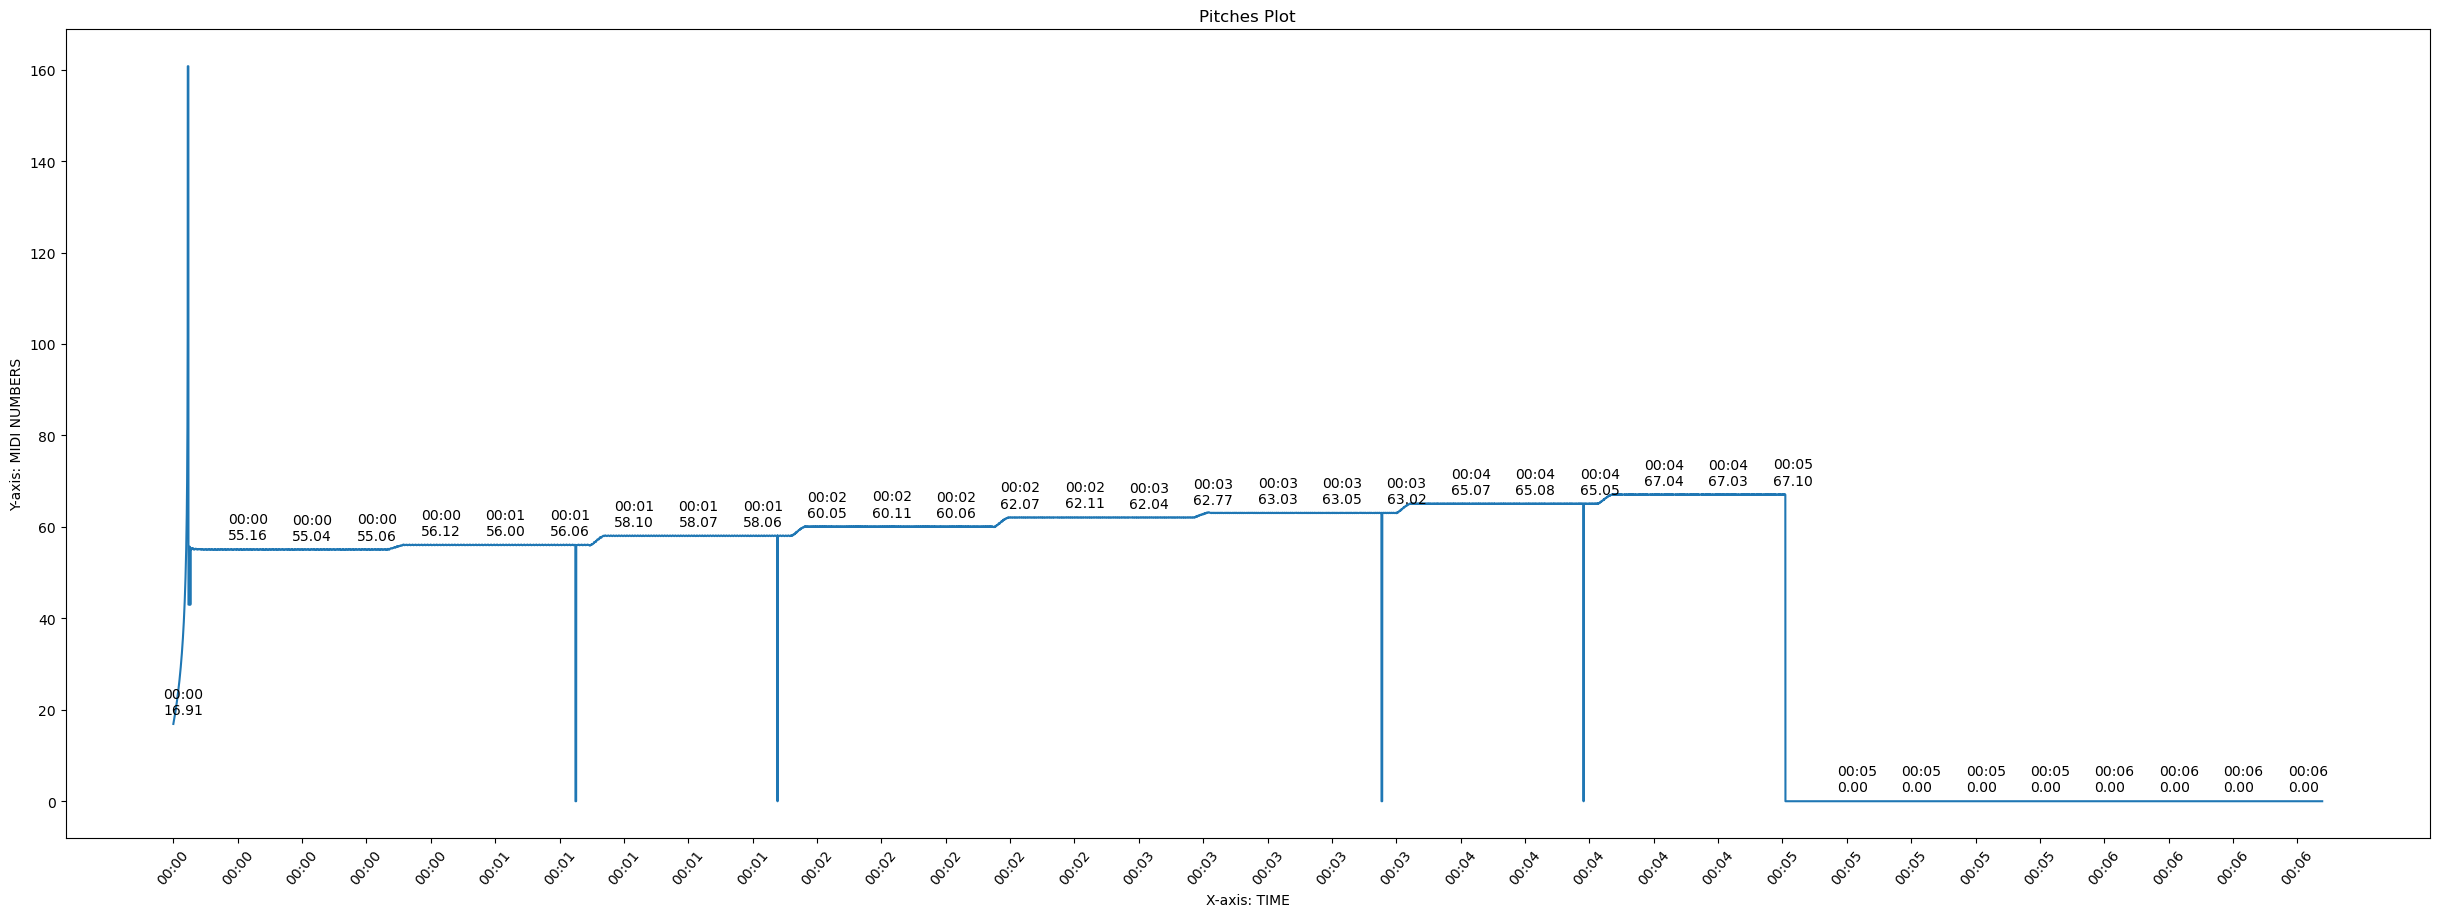

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [i for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: MIDI NUMBERS")
ax.set_title("Pitches Plot")

xrange = range(0,len(pitches),int(len(pitches)*0.03))
yrange = [pitches[i] for i in xrange]
ax.set_xticks(xrange)
x = [ "%02d:%02d" % (t/float(framerate)*hop_s/60, (t/float(framerate)*hop_s)%60) for t in xrange]
ax.set_xticklabels(x, rotation = 50)

for a,b,c in zip(x,yrange,xrange):
    ax.annotate(a+"\n"+"%.2f"%b, xy=(c,b), xytext=(-7,7), textcoords='offset points')

# Display the plot
plt.show()

In [35]:
fig.savefig("midi number by time - details.png")

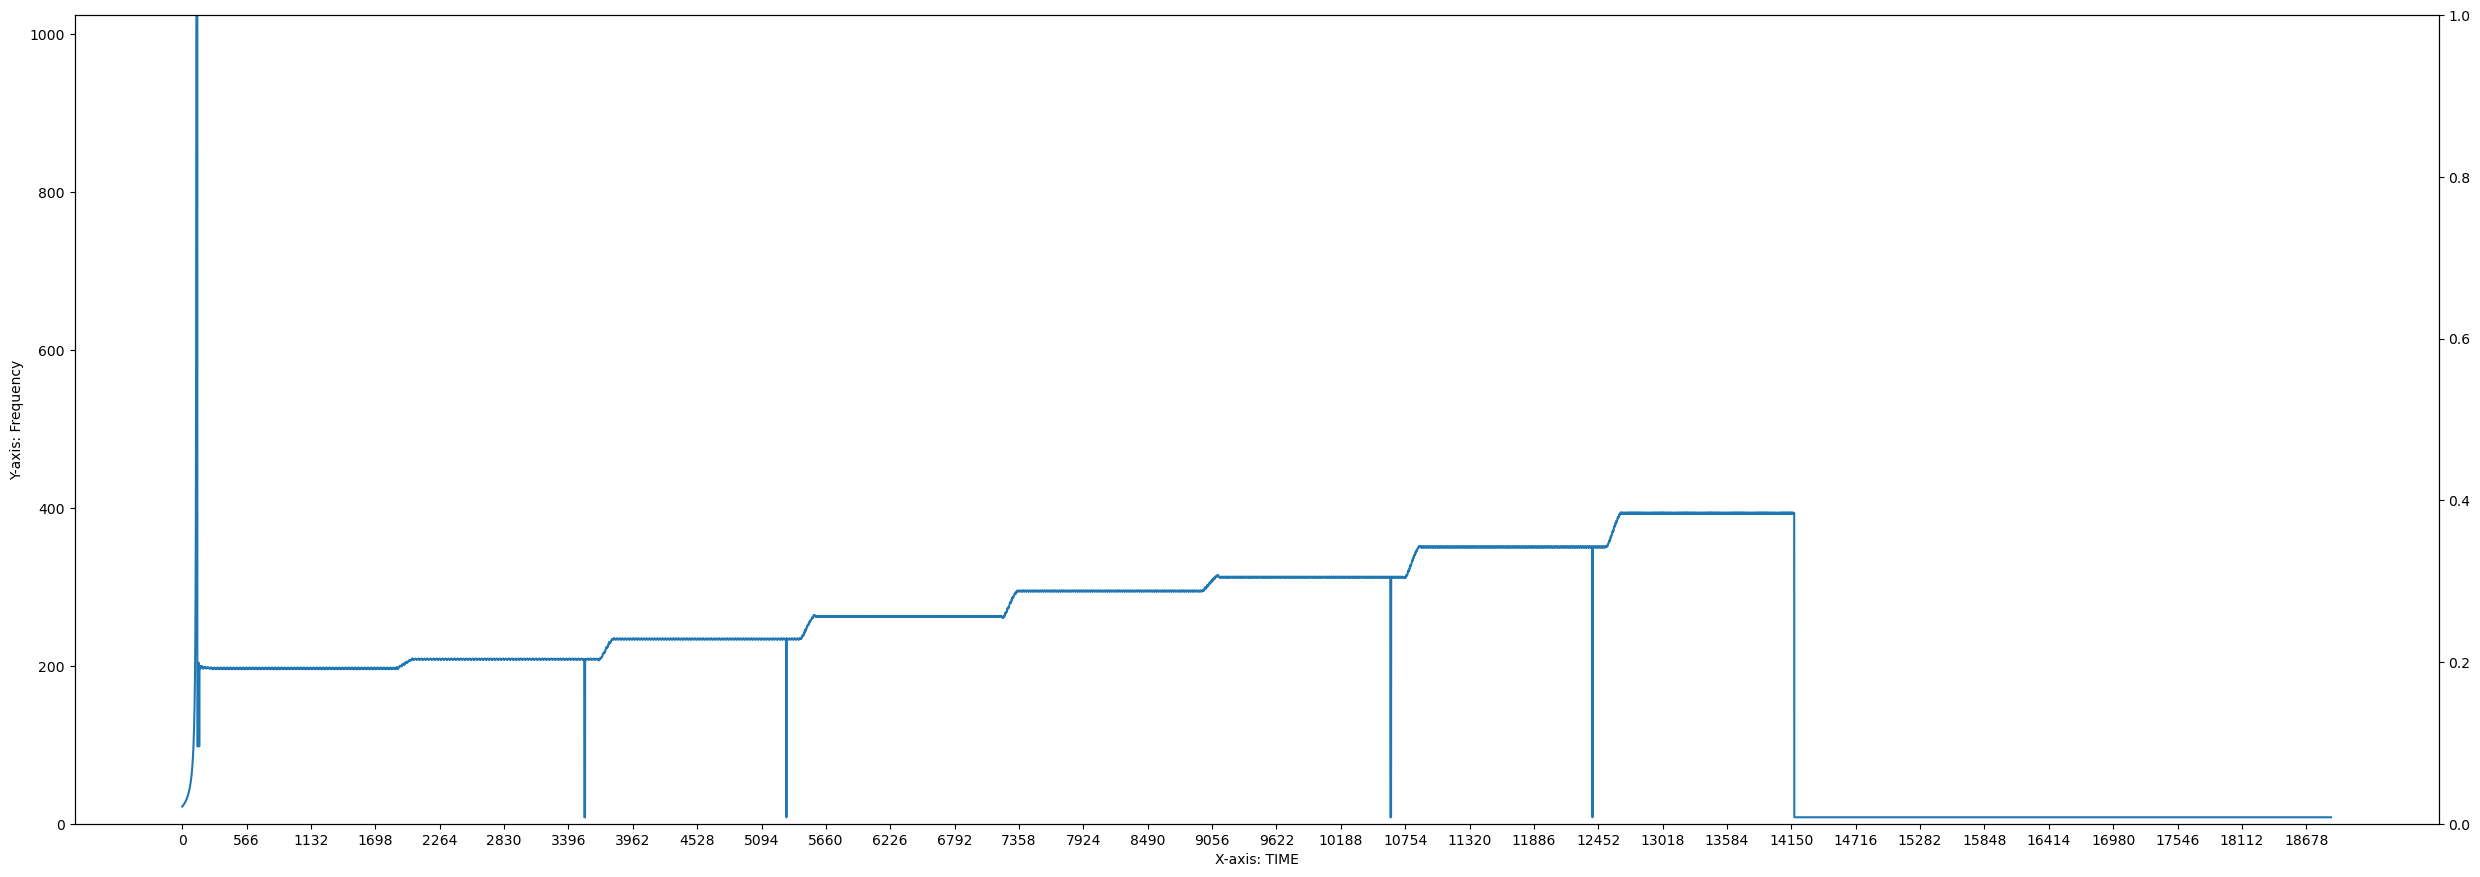

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [440*(2**((i-69)/12)) for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis")
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: Frequency")
ax.set_ylim([0, 1024])

ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax2 = ax.twinx()
#ax2.set_xticklabels([ "%02d:%02d" % (t/float(samplerate)*hop_s/60, (t/float(samplerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

In [12]:
fig.savefig("frequency by frame.png")

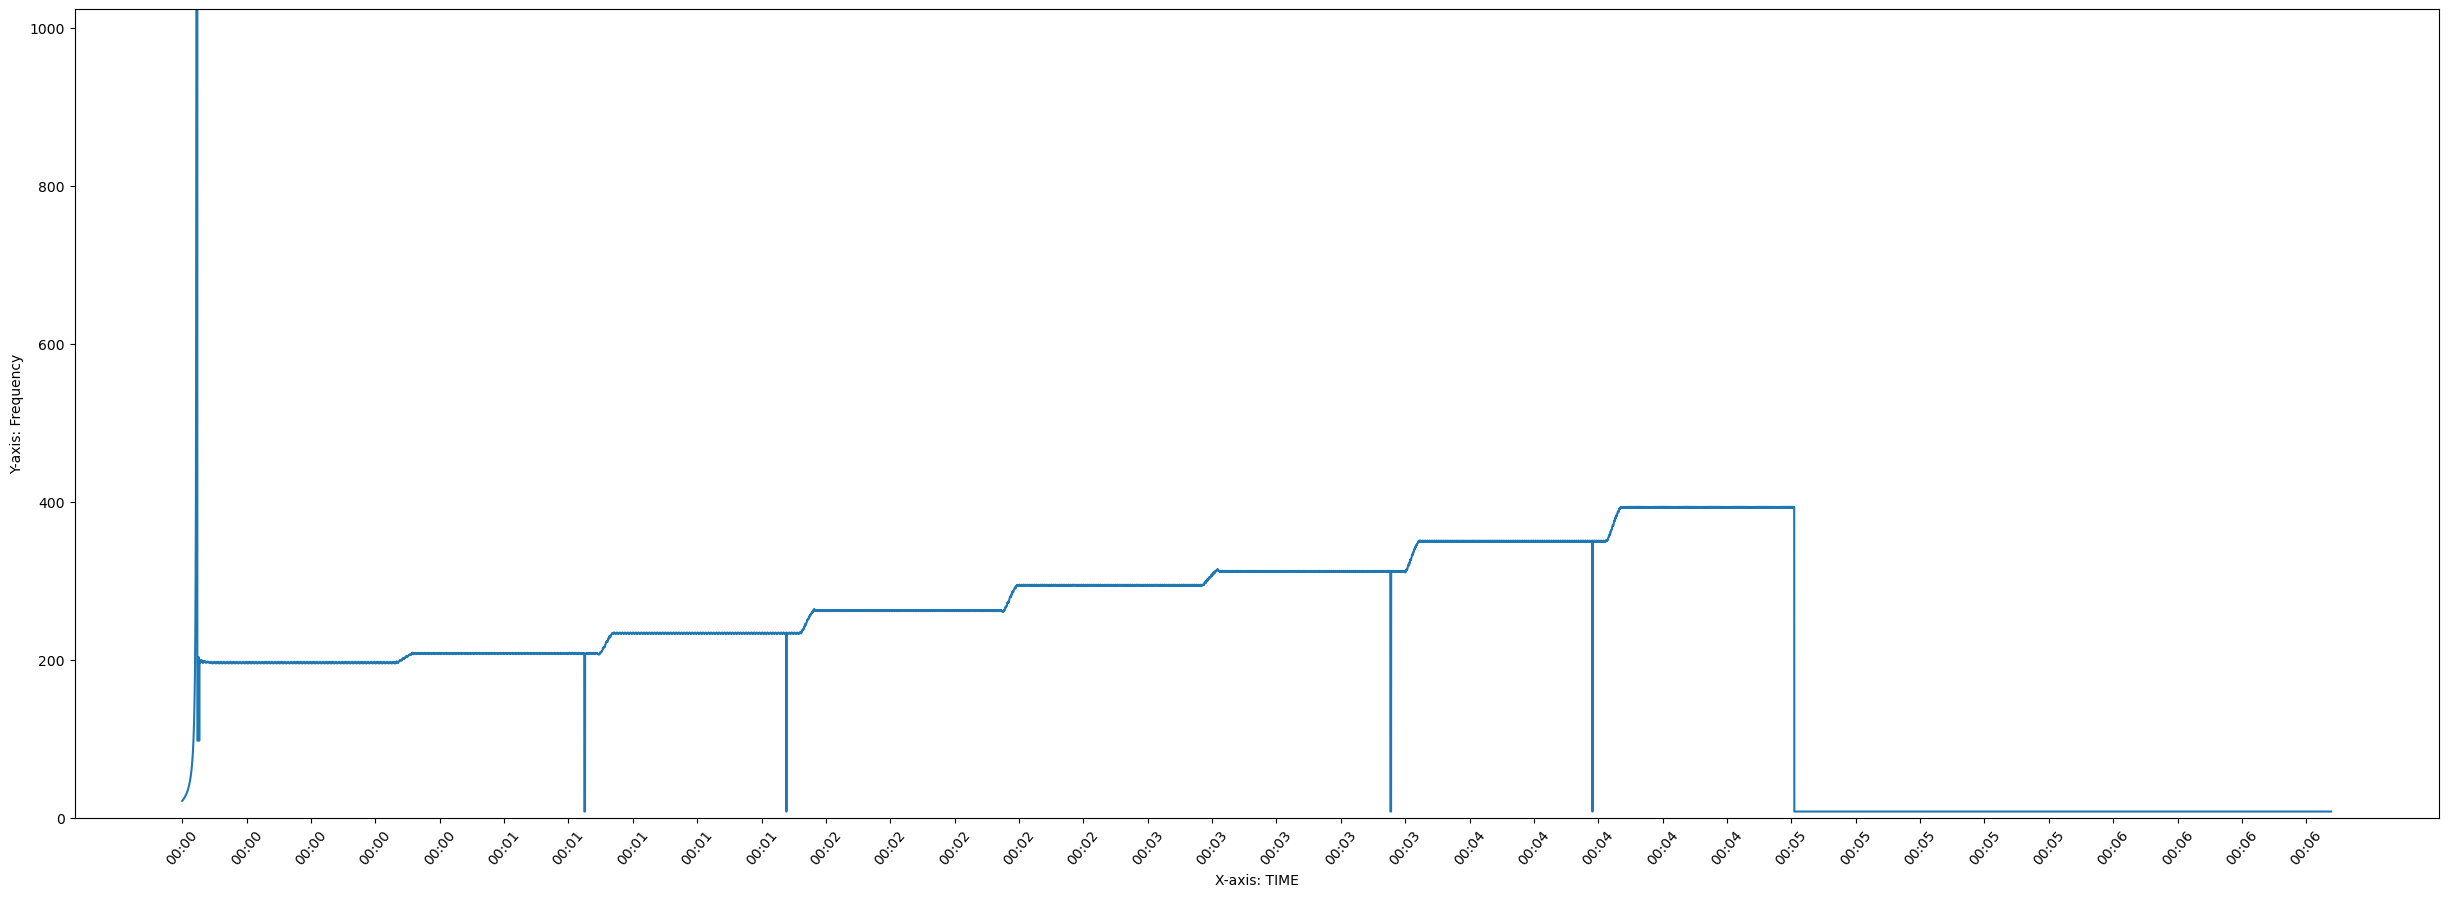

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [440*(2**((i-69)/12)) for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis")
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: Frequency")
ax.set_ylim([0, 1024])

ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax.set_xticklabels([ "%02d:%02d" % (t/float(framerate)*hop_s/60, (t/float(framerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

In [14]:
fig.savefig("frequency by time.png")

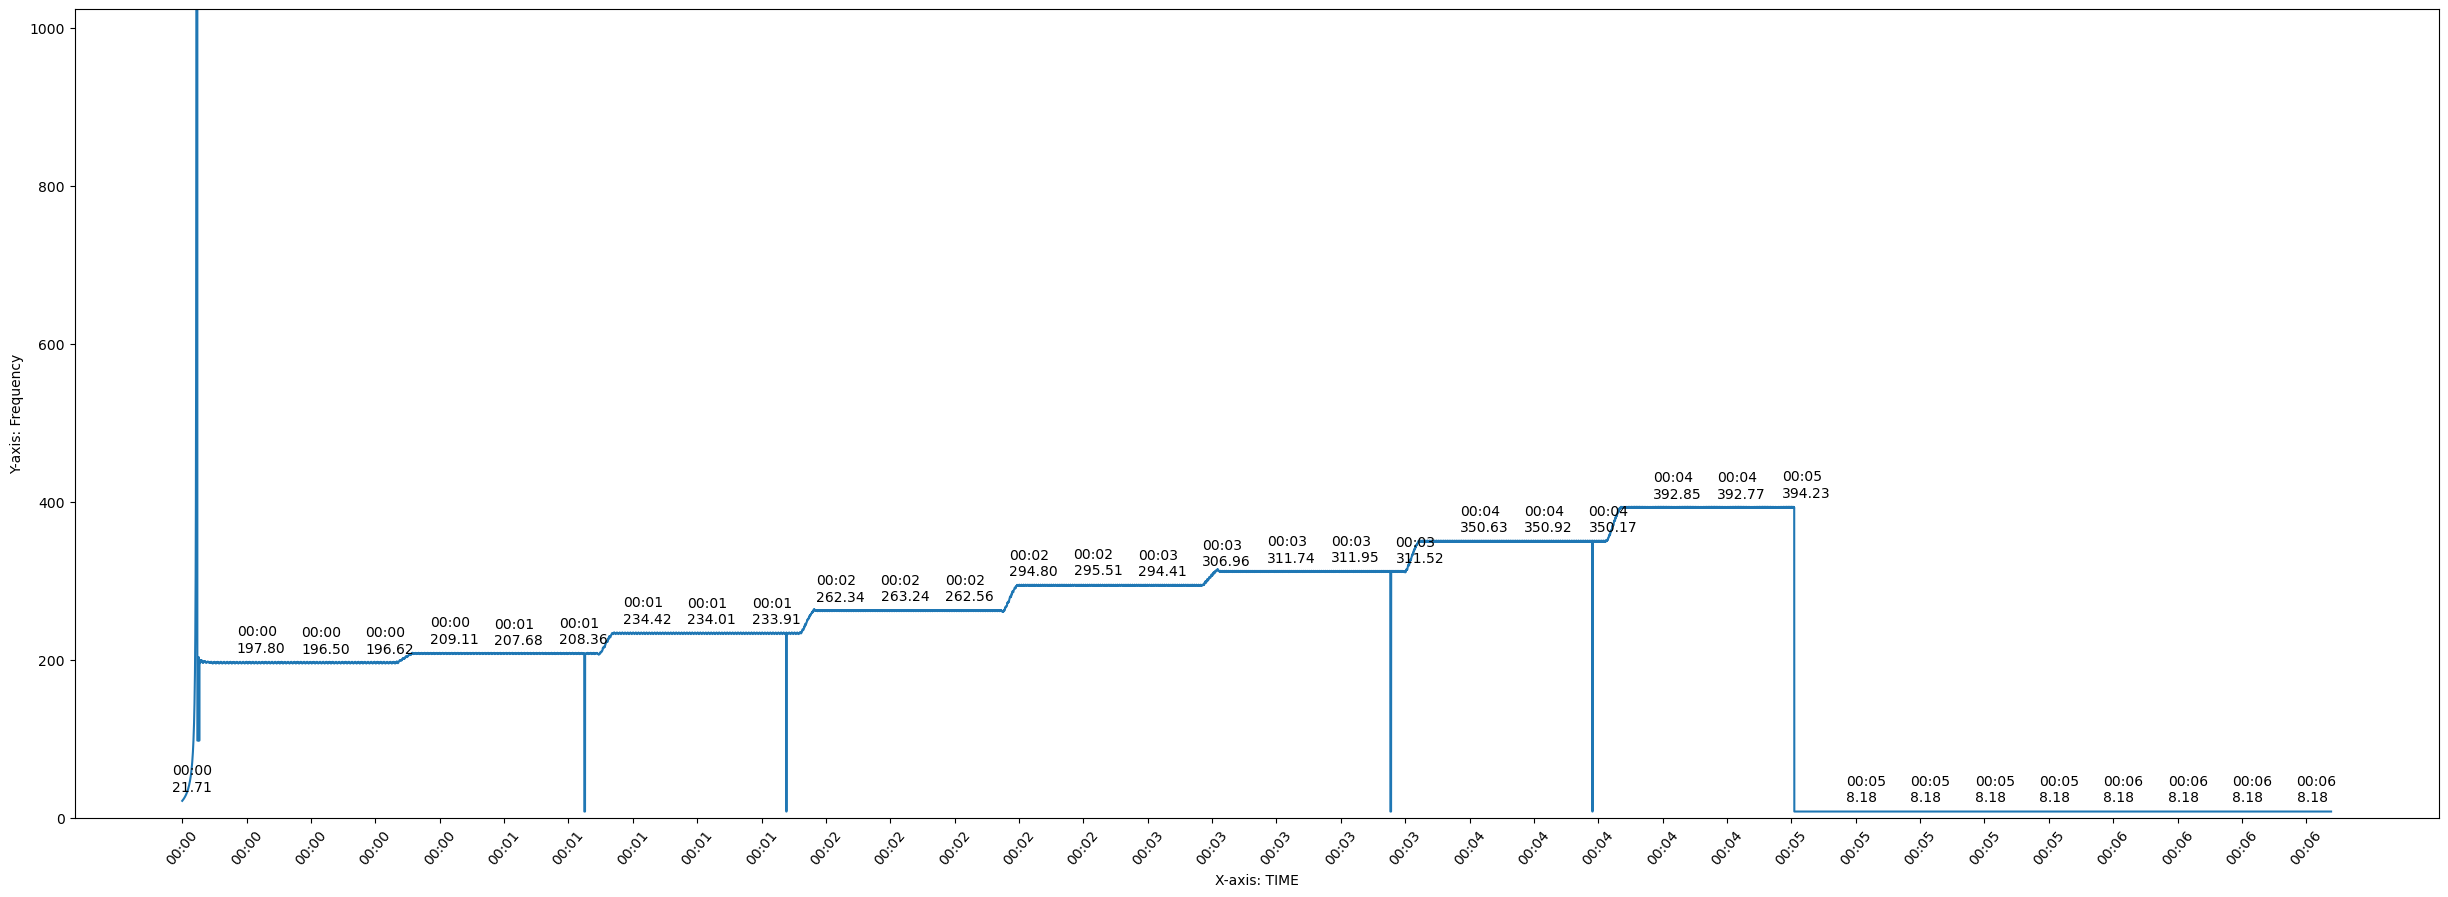

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

fpitches = [440*(2**((i-69)/12)) for i in pitches]

# Plot the data
ax.plot(range(len(pitches)), fpitches)

# Add labels and a title
ax.set_xlabel("X-axis")
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: Frequency")
ax.set_ylim([0, 1024])

xrange = range(0,len(fpitches),int(len(fpitches)*0.03))
yrange = [fpitches[i] for i in xrange]
ax.set_xticks(xrange)
x = [ "%02d:%02d" % (t/float(framerate)*hop_s/60, (t/float(framerate)*hop_s)%60) for t in xrange]
ax.set_xticklabels(x, rotation = 50)

for a,b,c in zip(x,yrange,xrange):
    ax.annotate(a+"\n"+"%.2f"%b, xy=(c,b), xytext=(-7,7), textcoords='offset points')

# Display the plot
plt.show()

In [40]:
fig.savefig("frequency by time - details.png")

In [ ]:
# ax.get_xticks()/samplerate

In [15]:
for i in [566,2830,4528,6226,7924,9622,11320,13018]:
  print(int(pitches[i]))

55
56
58
60
62
63
65
67


In [16]:
for i in [566,2830,4528,6226,7924,9622,11320,13018]:
  print(440*(2**((pitches[i]-69)/12)))

197.79563602544948
207.68419690130412
234.00971737690418
263.2438877132611
295.510703682336
311.74074824272
350.6343309500313
392.84714827655745


In [17]:
f = open("midi by frame.csv","w",encoding="utf-8")
f.write("frame,midi numbers"+"\n")
for a,b in zip(range(len(pitches)), pitches):
  f.write(str(a)+","+str(b)+"\n")
f.close()

In [18]:
time = ["%02d:%02d" % (t/float(framerate)*hop_s/60, (t/float(framerate)*hop_s)%60) for t in range(0,len(pitches))]

In [19]:
f = open("midi by time.csv","w",encoding="utf-8")
f.write("time,midi numbers"+"\n")
for a,b in zip(time, pitches):
  f.write(str(a)+","+str(b)+"\n")
f.close()

In [20]:
f = open("frequency by frame.csv","w",encoding="utf-8")
f.write("frame,frequency"+"\n")
for a,b in zip(range(len(pitches)), pitches):
  f.write(str(a)+","+str(440*(2**((b-69)/12)))+"\n")
f.close()

In [21]:
f = open("frequency by time.csv","w",encoding="utf-8")
f.write("time,frequency"+"\n")
for a,b in zip(time, pitches):
  f.write(str(a)+","+str(440*(2**((b-69)/12)))+"\n")
f.close()